Data extraction from Twitter using tweepy
Data cleaning & processing
Visualization using wordcloud
Sentiment Analysis

In [1]:
%pip install tweepy
%pip install pandas
%pip install langdetect
%pip install matplotlib
%pip install nltk
%pip install Pillow
%pip install scikit-learn
%pip install vaderSentiment
%pip install wordcloud
%pip install textblob
#wordcloud ONLY PYTHON 3.9 or below

import tweepy
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import os
from textblob import TextBlob

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
TWITTER_NLP_CONSUMER_KEY = os.environ.get("TWITTER_NLP_CONSUMER_KEY")
TWITTER_NLP_CONSUMER_SECRET = os.environ.get("TWITTER_NLP_CONSUMER_SECRET")
TWITTER_NLP_ACCESS_KEY = os.environ.get("TWITTER_NLP_ACCESS_KEY")
TWITTER_NLP_ACCESS_SECRET = os.environ.get("TWITTER_NLP_ACCESS_SECRET")

# Only for testing! Don't print your keys in production or publicly!
#print("Public Key:", TWITTER_NLP_CONSUMER_KEY)
#print("Private Key:", TWITTER_NLP_CONSUMER_SECRET)
#print("Public Key:", TWITTER_NLP_ACCESS_KEY)
#print("Private Key:", TWITTER_NLP_ACCESS_SECRET)

In [3]:
#Data Extraction

auth = tweepy.OAuthHandler(TWITTER_NLP_CONSUMER_KEY, TWITTER_NLP_CONSUMER_SECRET)
auth.set_access_token(TWITTER_NLP_ACCESS_KEY, TWITTER_NLP_ACCESS_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True)

#Búsqueda de tweets

query = '#ChatGPT' # Término que se quiere buscar 

max_tweets = 100 #Número máximo de tweets a obtener 

#Obtener resultados 
searched_tweets = [status._json['text'] for status in tweepy.Cursor(api.search_tweets, lang='en', q=query).items(max_tweets)]  #Lista de resultados 
searched_tweets[:10]

TypeError: Consumer key must be string or bytes, not NoneType

In [ ]:
df = pd.DataFrame(searched_tweets)
df.rename({0:'text'},axis='columns',inplace=True)
display(df)
#Check for nulls/blank fields
print(df.count(), df.isnull().sum())

,text
0,An Interview with ChatGPT About Health Care | ...
1,LLM Pipeline Viz\nHere’s a WIP mapping of how ...
2,"Live from the courtroom, this is #ChatGPT, rep..."
3,#ChatGPT ban in Italy sparks interest of EU pr...
4,🙏 Grateful for every blessing 🙏 \n#People Of T...
...,...
4995,OpenAI .NET: Fine-Turning Models Integrations ...
4996,9 Best AI Tools Every Human MUST Know!\n\n#AI ...
4997,RT @SwissStellar: Did you know #ChatGPT CEO is...
4998,RT @Python_Dv: Build an AI-Powered Advice Bot ...


text    5000
dtype: int64 text    0
dtype: int64


In [ ]:
#Remove special characters/links
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
def tweet_cleaner(x):
   text=re.sub('@[^\s]+',"", x)               # Remove mentions
   text=re.sub('#[^\s]+',"",text)
   text=re.sub(r"http\S+","", text)           # Remove media links
   text=re.sub('RT ', '', text)               # remove the RT
   text = re.sub(r'[^a-zA-Z0-9\s]+', '', text)
   text=emoji_pattern.sub(r'',text)
   return  pd.Series([text])

df[['plain_text']] = df.text.apply(tweet_cleaner)
#Convert all text to lowercase
df.plain_text = df.plain_text.str.lower()
#Remove newline character
df.plain_text = df.plain_text.str.replace('\n', '')
#Replacing any empty strings with null
df = df.replace(r'^\s*$', np.nan, regex=True)
if df.isnull().sum().plain_text == 0:
   print ('no empty strings')
else:
   df.dropna(inplace=True)

display(df)

,text,plain_text
0,An Interview with ChatGPT About Health Care | ...,an interview with chatgpt about health care ...
1,LLM Pipeline Viz\nHere’s a WIP mapping of how ...,llm pipeline vizheres a wip mapping of how to ...
2,"Live from the courtroom, this is #ChatGPT, rep...",live from the courtroom this is reportingtrum...
3,#ChatGPT ban in Italy sparks interest of EU pr...,ban in italy sparks interest of eu privacy re...
4,🙏 Grateful for every blessing 🙏 \n#People Of T...,grateful for every blessing of the g...
...,...,...
4995,OpenAI .NET: Fine-Turning Models Integrations ...,openai net fineturning models integrations in...
4996,9 Best AI Tools Every Human MUST Know!\n\n#AI ...,9 best ai tools every human must know
4997,RT @SwissStellar: Did you know #ChatGPT CEO is...,did you know ceo is advisor at
4998,RT @Python_Dv: Build an AI-Powered Advice Bot ...,build an aipowered advice bot with chatgpt ap...


In [ ]:
#detect language of tweets
from langdetect import detect
def detect_textlang(text):
    try:
        src_lang = detect(text)
        if src_lang =='en':
            return 'en'
        else:
        #return "NA"    
            return src_lang
    except:
        return "NA"
df['text_lang']=df.plain_text.apply(detect_textlang)
display(df)

,text,plain_text,text_lang
0,An Interview with ChatGPT About Health Care | ...,an interview with chatgpt about health care ...,en
1,LLM Pipeline Viz\nHere’s a WIP mapping of how ...,llm pipeline vizheres a wip mapping of how to ...,en
2,"Live from the courtroom, this is #ChatGPT, rep...",live from the courtroom this is reportingtrum...,en
3,#ChatGPT ban in Italy sparks interest of EU pr...,ban in italy sparks interest of eu privacy re...,en
4,🙏 Grateful for every blessing 🙏 \n#People Of T...,grateful for every blessing of the g...,en
...,...,...,...
4995,OpenAI .NET: Fine-Turning Models Integrations ...,openai net fineturning models integrations in...,en
4996,9 Best AI Tools Every Human MUST Know!\n\n#AI ...,9 best ai tools every human must know,en
4997,RT @SwissStellar: Did you know #ChatGPT CEO is...,did you know ceo is advisor at,en
4998,RT @Python_Dv: Build an AI-Powered Advice Bot ...,build an aipowered advice bot with chatgpt ap...,en


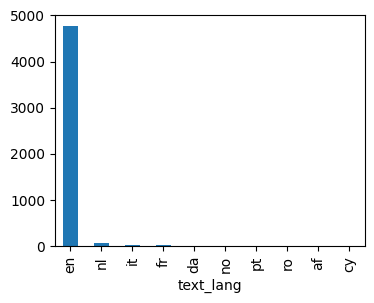

In [ ]:
# Group tweets by language and list the top 10
plt.figure(figsize=(4,3))
df.groupby(df.text_lang).plain_text.count().sort_values(ascending=False).head(10).plot.bar()
plt.show()

,text,plain_text,text_lang
0,An Interview with ChatGPT About Health Care | ...,an interview with chatgpt about health care ...,en
1,LLM Pipeline Viz\nHere’s a WIP mapping of how ...,llm pipeline vizheres a wip mapping of how to ...,en
2,"Live from the courtroom, this is #ChatGPT, rep...",live from the courtroom this is reportingtrum...,en
3,#ChatGPT ban in Italy sparks interest of EU pr...,ban in italy sparks interest of eu privacy re...,en
4,🙏 Grateful for every blessing 🙏 \n#People Of T...,grateful for every blessing of the g...,en
...,...,...,...
4995,OpenAI .NET: Fine-Turning Models Integrations ...,openai net fineturning models integrations in...,en
4996,9 Best AI Tools Every Human MUST Know!\n\n#AI ...,9 best ai tools every human must know,en
4997,RT @SwissStellar: Did you know #ChatGPT CEO is...,did you know ceo is advisor at,en
4998,RT @Python_Dv: Build an AI-Powered Advice Bot ...,build an aipowered advice bot with chatgpt ap...,en


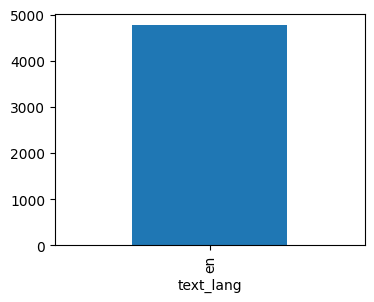

In [ ]:
df = df[df.text_lang == 'en']
display(df)
plt.figure(figsize=(4,3))
df.groupby(df.text_lang).plain_text.count().sort_values(ascending=False).head(10).plot.bar()
plt.show()

,text,plain_text,text_lang,polarity,sentiment
0,An Interview with ChatGPT About Health Care | ...,an interview with chatgpt about health care ...,en,0.4939,Positive
1,LLM Pipeline Viz\nHere’s a WIP mapping of how ...,llm pipeline vizheres a wip mapping of how to ...,en,0.0000,Neutral
2,"Live from the courtroom, this is #ChatGPT, rep...",live from the courtroom this is reportingtrum...,en,0.7841,Positive
3,#ChatGPT ban in Italy sparks interest of EU pr...,ban in italy sparks interest of eu privacy re...,en,-0.1531,Negative
4,🙏 Grateful for every blessing 🙏 \n#People Of T...,grateful for every blessing of the g...,en,0.7351,Positive
...,...,...,...,...,...
4995,OpenAI .NET: Fine-Turning Models Integrations ...,openai net fineturning models integrations in...,en,0.0000,Neutral
4996,9 Best AI Tools Every Human MUST Know!\n\n#AI ...,9 best ai tools every human must know,en,0.6369,Positive
4997,RT @SwissStellar: Did you know #ChatGPT CEO is...,did you know ceo is advisor at,en,0.0000,Neutral
4998,RT @Python_Dv: Build an AI-Powered Advice Bot ...,build an aipowered advice bot with chatgpt ap...,en,0.0000,Neutral


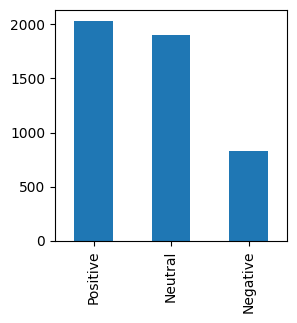

In [ ]:
df[['polarity', 'subjectivity']] = df['plain_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df['plain_text'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound'] = comp
df.head(10)
plt.figure(figsize=(3,3))
df.sentiment.value_counts().plot.bar()
display(df)

In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
df_negative = df[df['sentiment']=='Negative']
df_positive = df[df['sentiment']=='Positive']
df_neutral = df[df['sentiment']=='Neutral']

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(df,'sentiment')

,Total,Percentage
Positive,2033,42.64
Neutral,1904,39.93
Negative,831,17.43


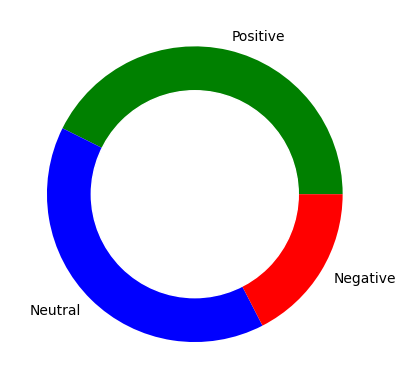

In [ ]:
# create data for Pie Chart
data = count_values_in_column(df,'sentiment')
names= data.index
size=data['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green', 'blue', 'red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text, name):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    max_words=3000,
    stopwords=stopwords,
    repeat=True)

    wc.generate(str(text))
    wc.to_file(f'{name}.png')
    path=f'{name}.png'
    display(Image.open(path))

Most common words


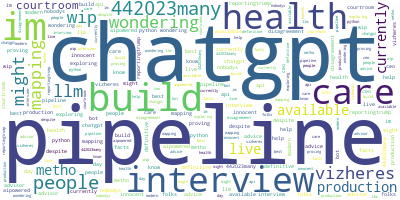

Most common negative words


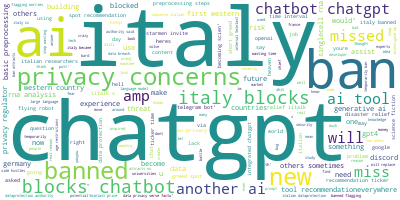

Most common positive words


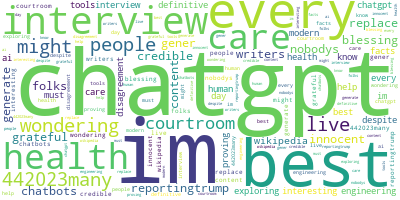

In [ ]:
print('Most common words')
create_wordcloud(df['plain_text'].values, 'all')
print('Most common negative words')
create_wordcloud(df_negative['plain_text'].values, 'negative')
print('Most common positive words')
create_wordcloud(df_positive['plain_text'].values, 'positive')

In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(stop_words='english') 
countVector = countVectorizer.fit_transform(df_negative['plain_text'])
print(f'{countVector.shape[0]} Number of reviews has {countVector.shape[1]} words')

negative_count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())

# Most Used Words
count = pd.DataFrame(negative_count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

831 Number of reviews has 2120 words


,00237,00403,01204333041,01273,0604,0744,08,0806,0811,0984,...,yes,yesterday,yetthe,yo,youre,youtube,youve,youyou,zero,zeroday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(stop_words='english') 
countVector = countVectorizer.fit_transform(df_positive['plain_text'])
print(f'{countVector.shape[0]} Number of reviews has {countVector.shape[1]} words')

positive_count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())

count = pd.DataFrame(positive_count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

2033 Number of reviews has 3931 words


,01,09,10,100,1000,1000month,100check,100k,101,10sec,...,youve,youyou,yt,zenbe,zerby,zero,zeroday,zeta,zoho,zs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(df['plain_text'],(2,2),20)
n2_bigrams

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(df['plain_text'],(3,3),20)
n3_trigrams